large-ancient: 100%|██████████| 30/30 [00:17<00:00,  1.76it/s]


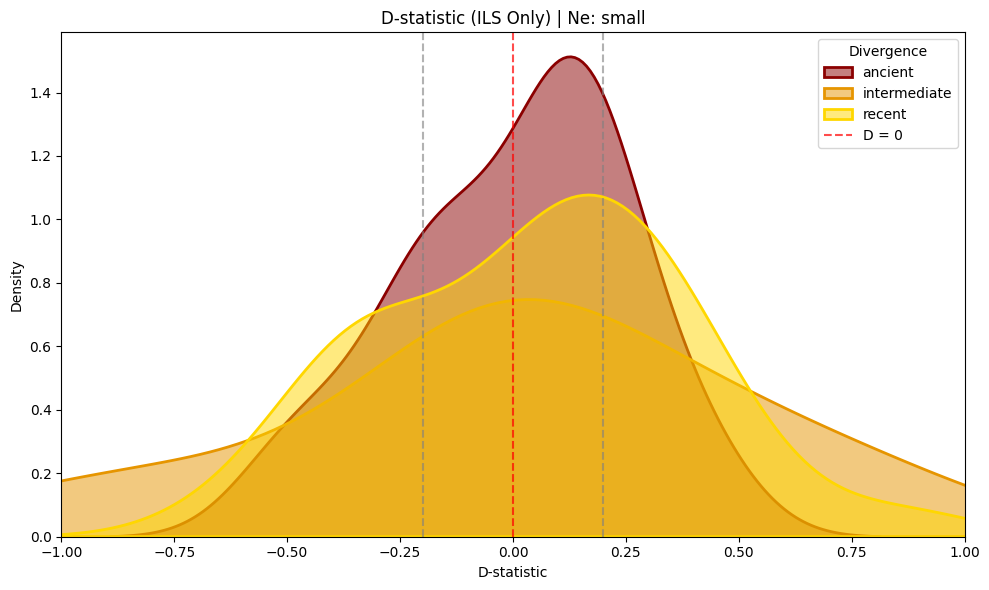

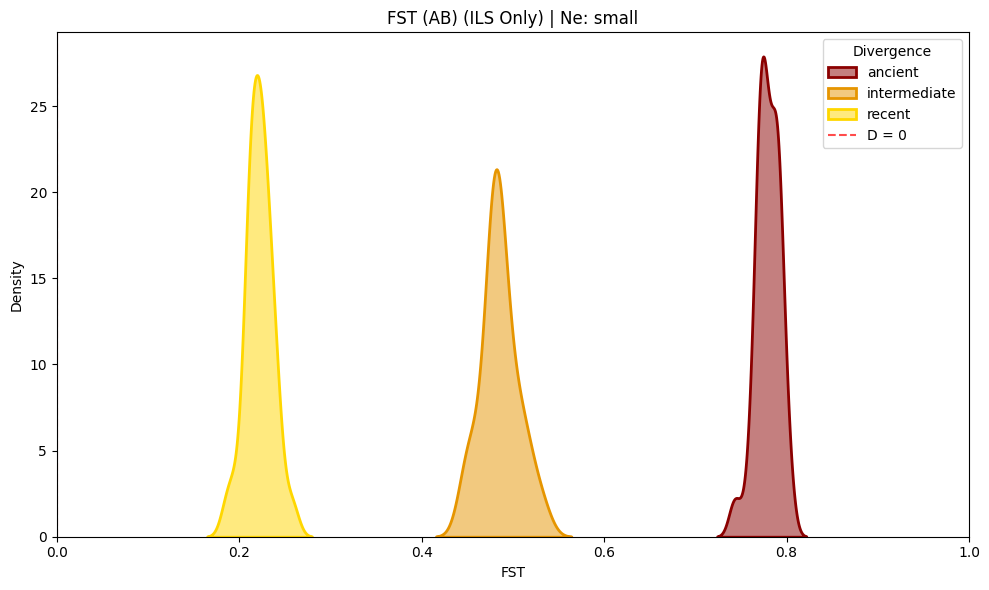

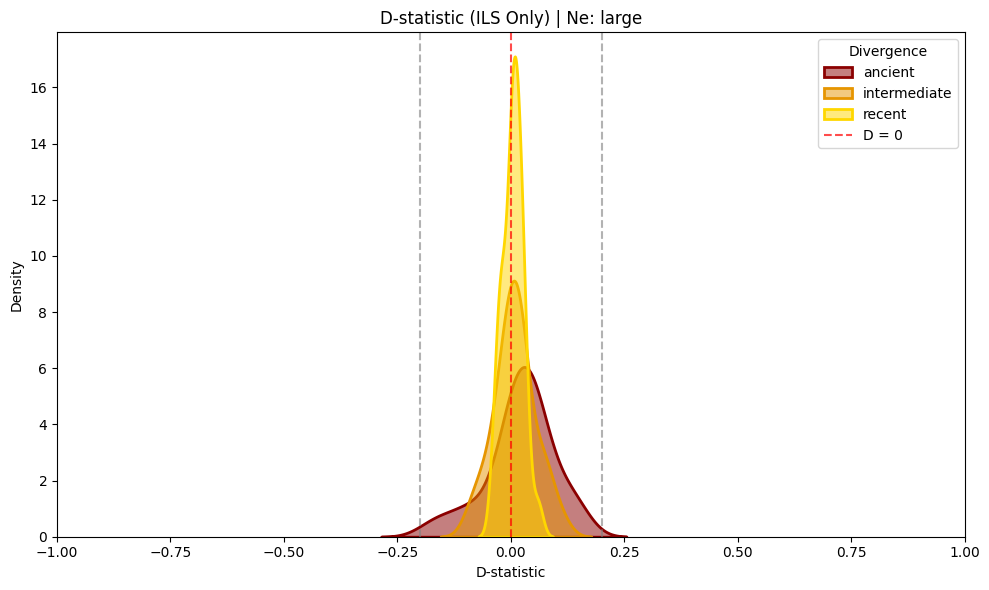

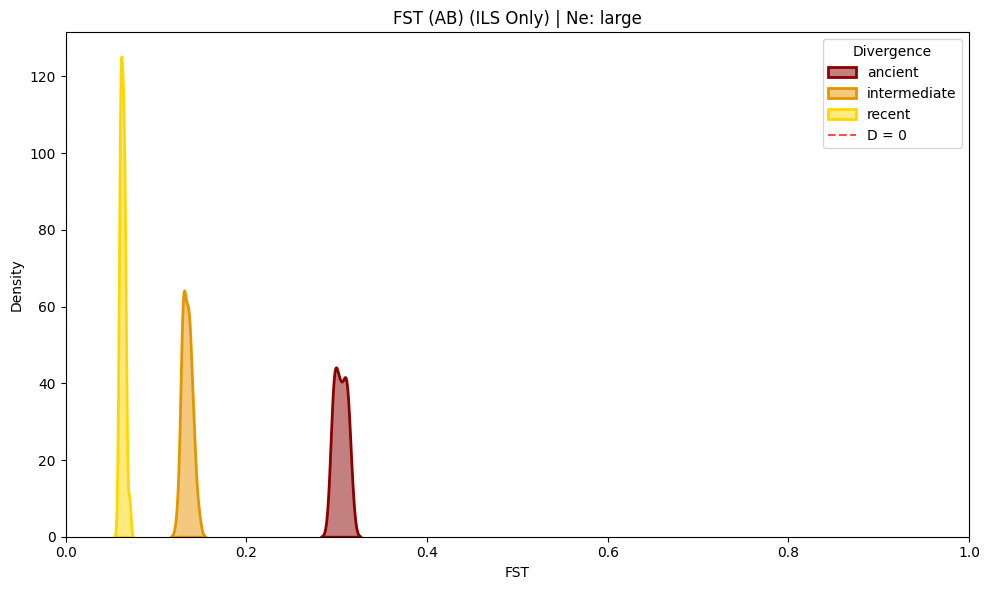

In [1]:
### 1_ILS_only_results.ipynb

# Patch to fix import errors
import os
import sys

# Get absolute path to the project root (assumes notebook is in /notebooks)
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add 'simulations' to sys.path
simulations_path = os.path.join(project_root, 'simulations')
if simulations_path not in sys.path:
    sys.path.insert(0, simulations_path)

# Import modules from simulations
from ils_only import simulate_ils_scenario
from common_utils import (
    calculate_d_statistic,
    calculate_fst,
    plot_kde_distribution,
    save_dataframe
)

# Standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# =====================
# PARAMETERS + SETUP
# =====================
os.makedirs("../results/dstat_distributions", exist_ok=True)
os.makedirs("../results/fst_distributions", exist_ok=True)
os.makedirs("../figures", exist_ok=True)

n_replicates = 30
ne_values = {"small": 10000, "large": 100000}
divergence_times = {
    "recent": [50000, 25000],
    "intermediate": [200000, 100000],
    "ancient": [800000, 400000]
}

# =====================
# RUN SIMULATIONS
# =====================
results = []

for ne_label, ne in ne_values.items():
    for div_label, div_time in divergence_times.items():
        for rep in tqdm(range(n_replicates), desc=f"{ne_label}-{div_label}"):
            ts = simulate_ils_scenario(Ne=ne, divergence_time=div_time)
            d_stat, abba, baba = calculate_d_statistic(ts)
            fst_ab, fst_bc = calculate_fst(ts)  # Only 2 values returned now

            results.append({
                "Ne": ne_label,
                "divergence": div_label,
                "rep": rep,
                "D": d_stat,
                "ABBA": abba,
                "BABA": baba,
                "FST_AB": fst_ab,
                "FST_BC": fst_bc
            })

results_df = pd.DataFrame(results)
save_dataframe(results_df, "../results/dstat_distributions/ils_only.csv")

results_df.head()

# =====================
# PLOTTING
# =====================
# In your notebook
for ne in results_df["Ne"].unique():
    subset = results_df[results_df["Ne"] == ne]
    
    # D-statistic plots
    plot_kde_distribution(
        data=subset,
        group_col="divergence",
        value_col="D",
        title=f"D-statistic (ILS Only) | Ne: {ne}",
        xlabel="D-statistic",
        output_path=f"../figures/dstat_ils_{ne}.png",
        xlim=(-1, 1)
    )

    # FST plots
    plot_kde_distribution(
        data=subset,
        group_col="divergence",
        value_col="FST_AB",
        title=f"FST (AB) (ILS Only) | Ne: {ne}",
        xlabel="FST",
        output_path=f"../figures/fst_ils_{ne}.png",
        xlim=(0, 1)
    )




## 🧠 Interpretation
- D-statistic fluctuates around 0 in all cases — expected under pure ILS.
- FST increases with divergence time — expected due to greater genetic drift.
- Small Ne shows more variance due to increased drift.
- These distributions form the neutral baseline for comparison with introgression scenarios.
